In [103]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
from tensorflow import keras
import numpy as np

trim = 60000
train_images = np.load('letters_60000_28x28.npy')
train_images = train_images[:trim,:,:]
train_labels = np.load('gray_60000_28x28.npy')
train_labels = train_labels.reshape(60000,28*28)/255
train_labels = train_labels[:trim,:]

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    #keras.layers.Dense(235, activation='sigmoid'),
    keras.layers.Dense(28, activation='sigmoid'),
    keras.layers.Dense(28*28, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=2)



Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0557 - accuracy: 0.1328
Epoch 2/2
60000/60000 [==============================] - 7s 122us/sample - loss: 0.0372 - accuracy: 0.5157


In [104]:
from matplotlib import pyplot as plt
from math import floor


test_images = np.load('letters_10000_28x28.npy')
test_labels = np.load('gray_10000_28x28.npy')
test_labels_formated = test_labels.reshape(10000,28*28)/255
predictions = model.predict(test_images)





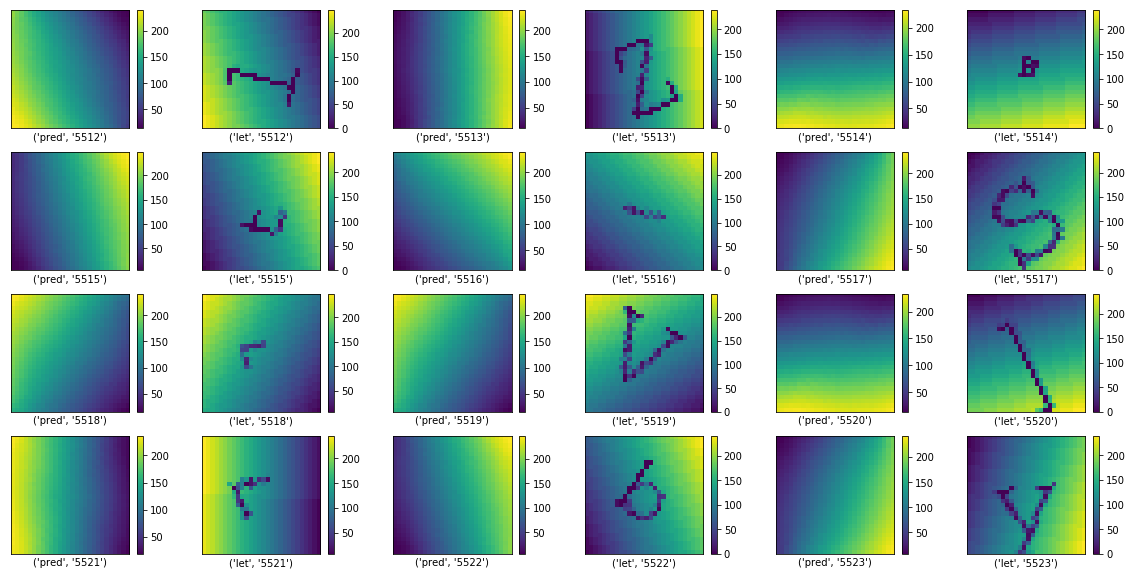

In [105]:
num_imx,num_imy  = 6,4
num_im = num_imx*num_imy

plt.figure(figsize=(20,10))
for i in range(num_im):
    plt.subplot(num_imy,num_imx,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ind = 5512+floor(i/2)
    if i%2 == 0:
        im = predictions[ind].reshape(28,28)*255
        label = 'pred',str(ind)
    else:
        #im = test_labels[ind]
        #label = 'ref',str(ind)
        im = test_images[ind]
        label = 'let',str(ind)
    plt.imshow(im)
    plt.xlabel(label)
    plt.colorbar()
plt.show()

In [50]:
noise_in = np.random.randint(255,size=(28*28)).reshape(1,28,28)
noise_out = model.predict(noise_in)


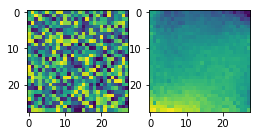

In [51]:
plt.figure(figsize=(4,3))
plt.subplot(1,2,1)
plt.imshow(noise_in[0])
plt.subplot(1,2,2)
plt.imshow(noise_out[0].reshape(28,28))
plt.show()